# Movie recomendation Analysis

* Dataset: TMDB Movies Dataset 2023
* Size: Over 100MB with over 930,000 records
* Source: Kaggle

### 1. Import Required Libraries 

In [1]:
# Essential Libraries for Film Industry Big Data Analysis

import dask.dataframe as dd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset using Dask (Big data analysis Library)

In [2]:

# Load dataset using Dask
df = dd.read_csv('TMDB_movie_dataset_v11.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
df.head()

Dataset shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(194856b)).size() // 24, dtype=int64>, 24)
Dataset columns: ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### 3: Display Basic Dataset Information

In [4]:
# Display Basic Dataset Information

print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)

print(f"Dataset shape: {df.shape[0].compute()} rows x {df.shape[1]} columns")
print(f"Dataset size in memory: {df.memory_usage(deep=True).sum().compute() / 1024**2:.2f} MB")

print("\nColumn Names and Data Types:")
for col, dtype in zip(df.columns, df.dtypes):
    print(f"  {col}: {dtype}")

print("\nMissing Values Analysis:")
missing_values = df.isnull().sum().compute()
missing_percent = (missing_values / len(df) * 100)
for col in df.columns:
    if missing_values[col] > 0:
        print(f"  {col}: {missing_values[col]} ({missing_percent[col]:.2f}%)")

print("\nNumerical Columns Summary:")
print(df.describe().compute())

print("\nCategorical Columns Unique Values:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_count = df[col].nunique().compute()
        print(f"  {col}: {unique_count} unique values")

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

DATASET INFORMATION
Dataset shape: 1275529 rows x 24 columns
Dataset size in memory: 658.04 MB

Column Names and Data Types:
  id: int64
  title: string
  vote_average: float64
  vote_count: int64
  status: string
  release_date: string
  revenue: int64
  runtime: int64
  adult: bool
  backdrop_path: string
  budget: int64
  homepage: string
  imdb_id: string
  original_language: string
  original_title: string
  overview: string
  popularity: float64
  poster_path: string
  tagline: string
  genres: string
  production_companies: string
  production_countries: string
  spoken_languages: string
  keywords: string

Missing Values Analysis:
  title: 14 (0.00%)
  release_date: 248047 (19.45%)
  backdrop_path: 947445 (74.28%)
  homepage: 1142567 (89.58%)
  imdb_id: 639949 (50.17%)
  original_title: 14 (0.00%)
  overview: 278718 (21.85%)
  poster_path: 428733 (33.61%)
  tagline: 1097151 (86.02%)
  genres: 538474 (42.22%)
  production_companies: 716373 (56.16%)
  production_countries: 594254

### 5: Enhanced Data Quality Assessment for Film Industry Analysis

In [5]:
# Enhanced Data Quality Assessment for Film Industry Analysis

print("=" * 70)
print("ENHANCED DATA QUALITY ASSESSMENT")
print("=" * 70)

# 1. Data Completeness Analysis
print("\n1. DATA COMPLETENESS ANALYSIS")
print("-" * 40)
completeness = (1 - df.isnull().sum() / len(df)) * 100
completeness_computed = completeness.compute()
print("Column Completeness (%):")
for col in df.columns:
    status = "✓ Good" if completeness_computed[col] >= 95 else "⚠ Poor" if completeness_computed[col] < 50 else "△ Fair"
    print(f"  {col}: {completeness_computed[col]:.1f}% {status}")



ENHANCED DATA QUALITY ASSESSMENT

1. DATA COMPLETENESS ANALYSIS
----------------------------------------
Column Completeness (%):
  id: 100.0% ✓ Good
  title: 100.0% ✓ Good
  vote_average: 100.0% ✓ Good
  vote_count: 100.0% ✓ Good
  status: 100.0% ✓ Good
  release_date: 80.6% △ Fair
  revenue: 100.0% ✓ Good
  runtime: 100.0% ✓ Good
  adult: 100.0% ✓ Good
  backdrop_path: 25.7% ⚠ Poor
  budget: 100.0% ✓ Good
  homepage: 10.4% ⚠ Poor
  imdb_id: 49.8% ⚠ Poor
  original_language: 100.0% ✓ Good
  original_title: 100.0% ✓ Good
  overview: 78.1% △ Fair
  popularity: 100.0% ✓ Good
  poster_path: 66.4% △ Fair
  tagline: 14.0% ⚠ Poor
  genres: 57.8% △ Fair
  production_companies: 43.8% ⚠ Poor
  production_countries: 53.4% △ Fair
  spoken_languages: 55.3% △ Fair
  keywords: 25.8% ⚠ Poor


In [6]:
# 3. Duplicate Records Analysis
print("\n3. DUPLICATE RECORDS ANALYSIS")
print("-" * 40)
total_rows = len(df)
duplicate_rows = df.map_partitions(lambda x: x.duplicated()).sum().compute()
print(f"Total records: {total_rows}")
print(f"Duplicate records: {duplicate_rows}")
print(f"Duplicate percentage: {(duplicate_rows/total_rows*100):.2f}%")




3. DUPLICATE RECORDS ANALYSIS
----------------------------------------
Total records: 1275529
Duplicate records: 317
Duplicate percentage: 0.02%


In [7]:
# 4. Outlier Detection for Numerical Columns
print("\n4. OUTLIER DETECTION")
print("-" * 40)
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25).compute()
    Q3 = df[col].quantile(0.75).compute()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count().compute()
    print(f"  {col}: {outliers} outliers ({(outliers/total_rows*100):.2f}%)")




4. OUTLIER DETECTION
----------------------------------------
  id: 0 outliers (0.00%)
  vote_average: 928334 outliers (72.78%)
  vote_count: 354682 outliers (27.81%)
  revenue: 22523 outliers (1.77%)
  runtime: 788717 outliers (61.83%)
  budget: 69862 outliers (5.48%)
  popularity: 1079570 outliers (84.64%)


In [8]:
# 5. Data Range Validation
print("\n5. DATA RANGE VALIDATION")
print("-" * 40)
for col in numerical_cols:
    min_val = df[col].min().compute()
    max_val = df[col].max().compute()
    print(f"  {col}: Range [{min_val:.2f} to {max_val:.2f}]")




5. DATA RANGE VALIDATION
----------------------------------------
  id: Range [2.00 to 1533908.00]
  vote_average: Range [0.00 to 10.00]
  vote_count: Range [0.00 to 34495.00]
  revenue: Range [-12.00 to 4999999999.00]
  runtime: Range [-28.00 to 14400.00]
  budget: Range [0.00 to 999999999.00]
  popularity: Range [0.00 to 2994.36]


In [9]:
# 6. Categorical Data Analysis
print("\n6. CATEGORICAL DATA ANALYSIS")
print("-" * 40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique().compute()
    top_value = df[col].value_counts().head(1).compute()
    print(f"  {col}: {unique_count} unique values")
    if len(top_value) > 0:
        print(f"    Most frequent: {top_value.index[0]} ({top_value.iloc[0]} times)")




6. CATEGORICAL DATA ANALYSIS
----------------------------------------


In [10]:
# 7. Data Quality Score
print("\n7. OVERALL DATA QUALITY SCORE")
print("-" * 40)
avg_completeness = completeness_computed.mean()
duplicate_penalty = (duplicate_rows/total_rows*100)
quality_score = avg_completeness - duplicate_penalty
print(f"Average Completeness: {avg_completeness:.1f}%")
print(f"Duplicate Penalty: {duplicate_penalty:.1f}%")
print(f"Overall Quality Score: {quality_score:.1f}%")

if quality_score >= 90:
    print("📊 Data Quality: EXCELLENT")
elif quality_score >= 75:
    print("📊 Data Quality: GOOD")
elif quality_score >= 60:
    print("📊 Data Quality: FAIR")
else:
    print("📊 Data Quality: POOR - Requires significant cleaning")


7. OVERALL DATA QUALITY SCORE
----------------------------------------
Average Completeness: 73.4%
Duplicate Penalty: 0.0%
Overall Quality Score: 73.4%
📊 Data Quality: FAIR


In [11]:
df.shape
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### 6: Data Preprocessing and Feature Engineering

In [3]:
# Step 3: Data Preprocessing

# First, convert Dask DataFrame to Pandas DataFrame
print("Converting Dask DataFrame to Pandas for preprocessing...")
df = df.compute()
print(f"Conversion complete. Shape: {df.shape}")

# Check for missing values and data types
print("\n=== Missing Values Check ===")
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values
print("\n=== Handling Missing Values ===")

# Fill missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled {col} with median")

# Fill missing values for categorical columns with mode or 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        if df[col].mode().empty:
            df[col].fillna('Unknown', inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled {col} with mode/Unknown")

# Remove duplicates
print(f"\n=== Removing Duplicates ===")
print(f"Shape before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Data type conversions
print(f"\n=== Data Type Conversions ===")

# Convert date columns if present
date_columns = ['release_date']
for col in date_columns:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print(f"Converted {col} to datetime")
        except:
            print(f"Could not convert {col} to datetime")

# Extract year from release_date if it exists
if 'release_date' in df.columns:
    df['release_year'] = df['release_date'].dt.year
    print("Extracted release_year from release_date")

# Clean and process text columns (genres, keywords, etc.)
text_columns = ['genres', 'keywords', 'production_companies', 
                'production_countries', 'spoken_languages']
for col in text_columns:
    if col in df.columns:
        # Remove brackets and quotes, split by comma
        df[col] = df[col].astype(str).str.replace(r'[\[\]\'"]', '', regex=True)
        print(f"Cleaned {col} column")

# Create binary features for popular genres
if 'genres' in df.columns:
    popular_genres = ['Action', 'Adventure', 'Comedy', 'Drama', 
                      'Horror', 'Romance', 'Thriller', 'Sci-Fi', 'Fantasy']
    for genre in popular_genres:
        df[f'genre_{genre.lower()}'] = df['genres'].str.contains(
            genre, case=False, na=False
        ).astype(int)
    print("Created binary genre features")

# Handle outliers in numerical columns
print(f"\n=== Handling Outliers ===")
for col in ['budget', 'revenue', 'runtime']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Handled {outliers_before} outliers in {col}")

# Create additional features
print(f"\n=== Creating Additional Features ===")

# Profit and ROI
if 'budget' in df.columns and 'revenue' in df.columns:
    df['profit'] = df['revenue'] - df['budget']
    df['roi'] = np.where(
        df['budget'] > 0, 
        (df['revenue'] - df['budget']) / df['budget'], 
        0
    )
    print("Created profit and ROI features")

# Popularity bins
if 'popularity' in df.columns:
    df['popularity_category'] = pd.cut(
        df['popularity'], 
        bins=[0, 1, 5, 20, float('inf')], 
        labels=['Low', 'Medium', 'High', 'Very High']
    )
    print("Created popularity categories")

# Vote average bins
if 'vote_average' in df.columns:
    df['rating_category'] = pd.cut(
        df['vote_average'], 
        bins=[0, 5, 6.5, 8, 10], 
        labels=['Poor', 'Average', 'Good', 'Excellent']
    )
    print("Created rating categories")

print(f"\n=== Final Dataset Info ===")
print(f"Final shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")

print(f"\nMissing values after preprocessing:")
remaining_missing = df.isnull().sum()
if remaining_missing.sum() > 0:
    print(remaining_missing[remaining_missing > 0])
else:
    print("No missing values remaining!")

print(f"\nDataset is ready for analysis and modeling!")


Converting Dask DataFrame to Pandas for preprocessing...
Conversion complete. Shape: (1275529, 24)

=== Missing Values Check ===
id                            0
title                        14
vote_average                  0
vote_count                    0
status                        0
release_date             248047
revenue                       0
runtime                       0
adult                         0
backdrop_path            947445
budget                        0
homepage                1142567
imdb_id                  639949
original_language             0
original_title               14
overview                 278718
popularity                    0
poster_path              428733
tagline                 1097151
genres                   538474
production_companies     716373
production_countries     594254
spoken_languages         570668
keywords                 946445
dtype: int64

=== Handling Missing Values ===

=== Removing Duplicates ===
Shape before removing duplic

In [18]:
df.shape
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genre_drama,genre_horror,genre_romance,genre_thriller,genre_sci-fi,genre_fantasy,profit,roi,popularity_category,rating_category
0,27205,Inception,8.364,34495,Released,2010-07-15,0.0,148.0,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,0,0,0,0,0,0,0.0,0.0,Very High,Excellent
1,157336,Interstellar,8.417,32571,Released,2014-11-05,0.0,169.0,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,1,0,0,0,0,0,0.0,0.0,Very High,Excellent
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,0.0,152.0,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,1,0,0,1,0,0,0.0,0.0,Very High,Excellent
3,19995,Avatar,7.573,29815,Released,2009-12-15,0.0,162.0,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,0,0,0,0,0,1,0.0,0.0,Very High,Good
4,24428,The Avengers,7.710,29166,Released,2012-04-25,0.0,143.0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,0,0,0,0,0,0,0.0,0.0,Very High,Good


In [4]:
# Drop high-missing-value columns if not useful
high_missing_cols = ['homepage', 'tagline', 'poster_path', 'backdrop_path']
df.drop(columns=high_missing_cols, inplace=True, errors='ignore')
print(f"Dropped high-missing-value columns: {high_missing_cols}")

# Handle 'genres' and 'production_companies' missing values
for col in ['genres', 'production_companies']:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing {col} with 'Unknown'")

        
# Fix rating_category missing values
if 'vote_average' in df.columns:
    df['vote_average'].fillna(0, inplace=True)  # or median if you prefer
    df['rating_category'] = pd.cut(
        df['vote_average'],
        bins=[0, 5, 6.5, 8, 10],
        labels=['Poor', 'Average', 'Good', 'Excellent'],
        include_lowest=True
    )
    print("Re-created rating_category after filling missing vote_average")


Dropped high-missing-value columns: ['homepage', 'tagline', 'poster_path', 'backdrop_path']
Filled missing genres with 'Unknown'
Filled missing production_companies with 'Unknown'
Re-created rating_category after filling missing vote_average


In [20]:
df.shape
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,genre_drama,genre_horror,genre_romance,genre_thriller,genre_sci-fi,genre_fantasy,profit,roi,popularity_category,rating_category
0,27205,Inception,8.364,34495,Released,2010-07-15,0.0,148.0,False,0.0,...,0,0,0,0,0,0,0.0,0.0,Very High,Excellent
1,157336,Interstellar,8.417,32571,Released,2014-11-05,0.0,169.0,False,0.0,...,1,0,0,0,0,0,0.0,0.0,Very High,Excellent
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,0.0,152.0,False,0.0,...,1,0,0,1,0,0,0.0,0.0,Very High,Excellent
3,19995,Avatar,7.573,29815,Released,2009-12-15,0.0,162.0,False,0.0,...,0,0,0,0,0,1,0.0,0.0,Very High,Good
4,24428,The Avengers,7.710,29166,Released,2012-04-25,0.0,143.0,False,0.0,...,0,0,0,0,0,0,0.0,0.0,Very High,Good


### 7: Exploratory Data Analysis (EDA)


Using sample of 63764 rows for visualization


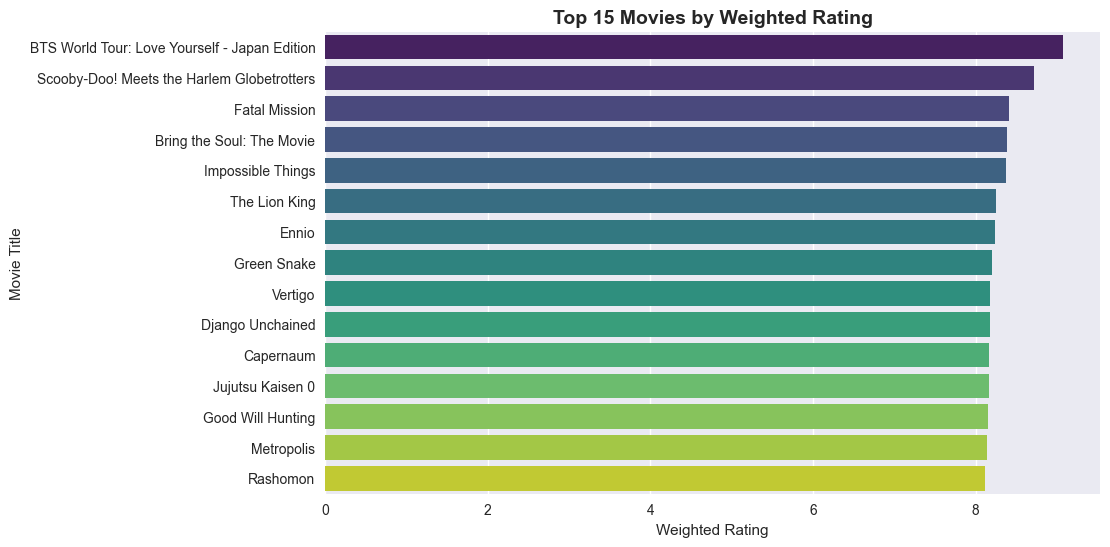

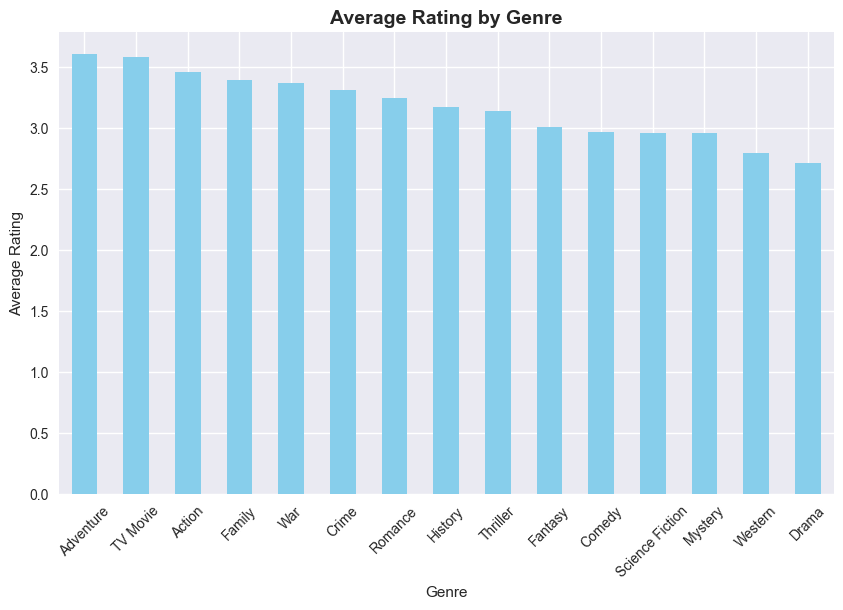

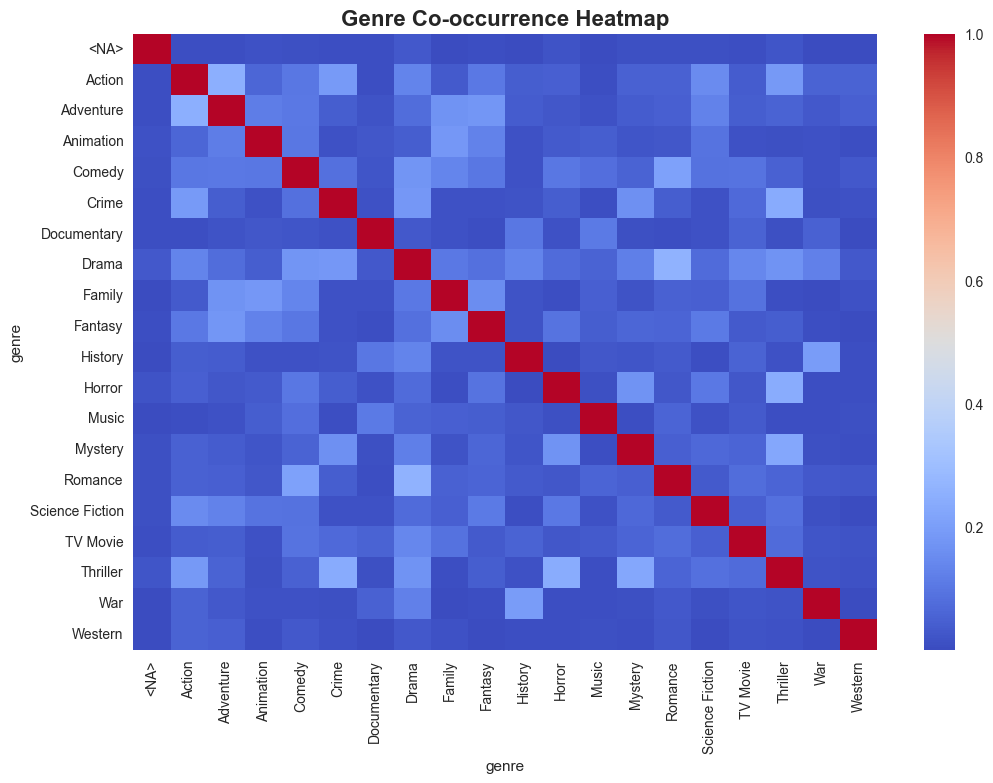

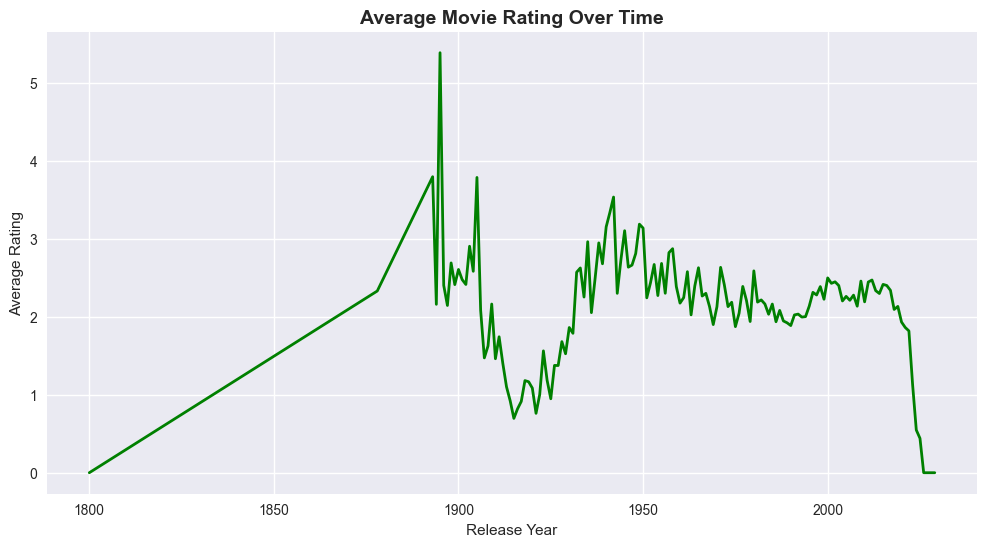

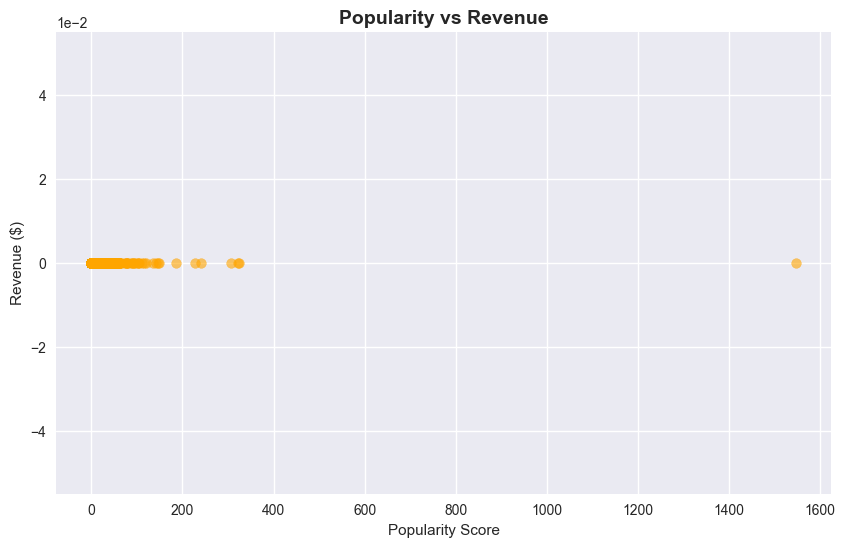

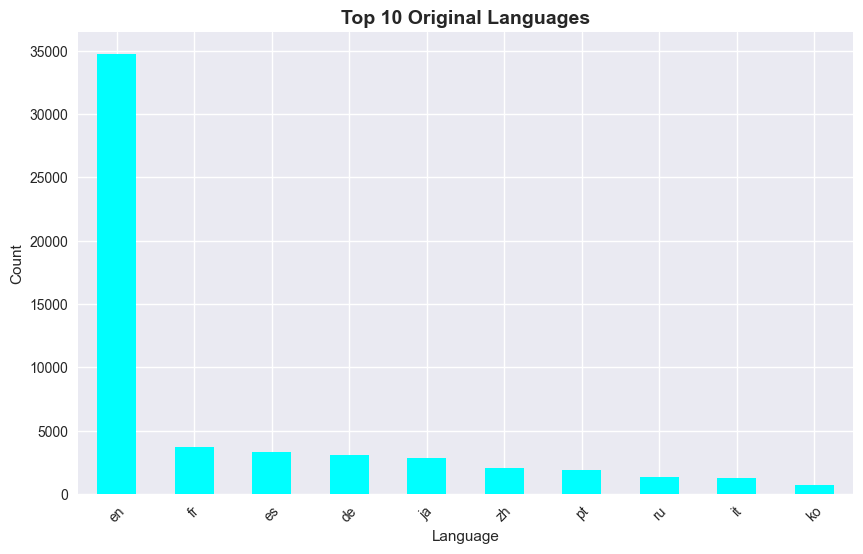

In [21]:
# Exploratory Data Analysis (EDA) - Film Industry Dataset


# ================================
# Recommendation-Focused EDA
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

# Use sample if dataset is too large
row_count = df.shape[0]
if row_count > 100000:
    df_sample = df.sample(frac=0.05, random_state=42)
    print(f"Using sample of {len(df_sample)} rows for visualization")
else:
    df_sample = df.copy()

# -------------------------------
# Weighted Rating (IMDB-style)
# -------------------------------
C = df_sample['vote_average'].mean()
m = df_sample['vote_count'].quantile(0.90)  # top 10% threshold
df_sample['weighted_rating'] = (
    (df_sample['vote_count'] / (df_sample['vote_count'] + m)) * df_sample['vote_average'] +
    (m / (df_sample['vote_count'] + m)) * C
)

# -------------------------------
# Explode genres for analysis
# -------------------------------
df_genres = df_sample.copy()
df_genres['genres'] = df_genres['genres'].astype(str)
df_genres = df_genres.assign(genre=df_genres['genres'].str.split(',')).explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()

# -------------------------------
# Top 15 Movies by Weighted Rating
# -------------------------------
top_movies = df_sample.sort_values('weighted_rating', ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(y=top_movies['title'], x=top_movies['weighted_rating'], palette='viridis')
plt.title('Top 15 Movies by Weighted Rating', fontsize=14, fontweight='bold')
plt.xlabel('Weighted Rating')
plt.ylabel('Movie Title')
plt.show()

# -------------------------------
# Average Rating by Genre
# -------------------------------
genre_avg = df_genres.groupby('genre')['vote_average'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
genre_avg.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


# -------------------------------
# Genre Co-occurrence Heatmap
# -------------------------------
genre_dummies = df_genres.pivot_table(index='title', columns='genre', aggfunc='size', fill_value=0)
from sklearn.metrics.pairwise import cosine_similarity
genre_similarity = cosine_similarity(genre_dummies.T)
genre_sim_df = pd.DataFrame(genre_similarity, index=genre_dummies.columns, columns=genre_dummies.columns)

plt.figure(figsize=(12,8))
sns.heatmap(genre_sim_df, cmap='coolwarm')
plt.title('Genre Co-occurrence Heatmap', fontsize=16, fontweight='bold')
plt.show()

# -------------------------------
# Rating Trend Over Time
# -------------------------------
df_sample['release_year'] = pd.to_datetime(df_sample['release_date'], errors='coerce').dt.year
yearly_rating = df_sample.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(12,6))
yearly_rating.plot(color='green', linewidth=2)
plt.title('Average Movie Rating Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

# -------------------------------
# Popularity vs Revenue Scatter
# -------------------------------
plt.figure(figsize=(10,6))
plt.scatter(df_sample['popularity'], df_sample['revenue'], alpha=0.6, color='orange')
plt.title('Popularity vs Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Popularity Score')
plt.ylabel('Revenue ($)')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.show()

# -------------------------------
# Top Languages
# -------------------------------
top_lang = df_sample['original_language'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_lang.plot(kind='bar', color='cyan')
plt.title('Top 10 Original Languages', fontsize=14, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




EXPLORATORY DATA ANALYSIS (EDA)
Using sample of 63764 rows for visualization


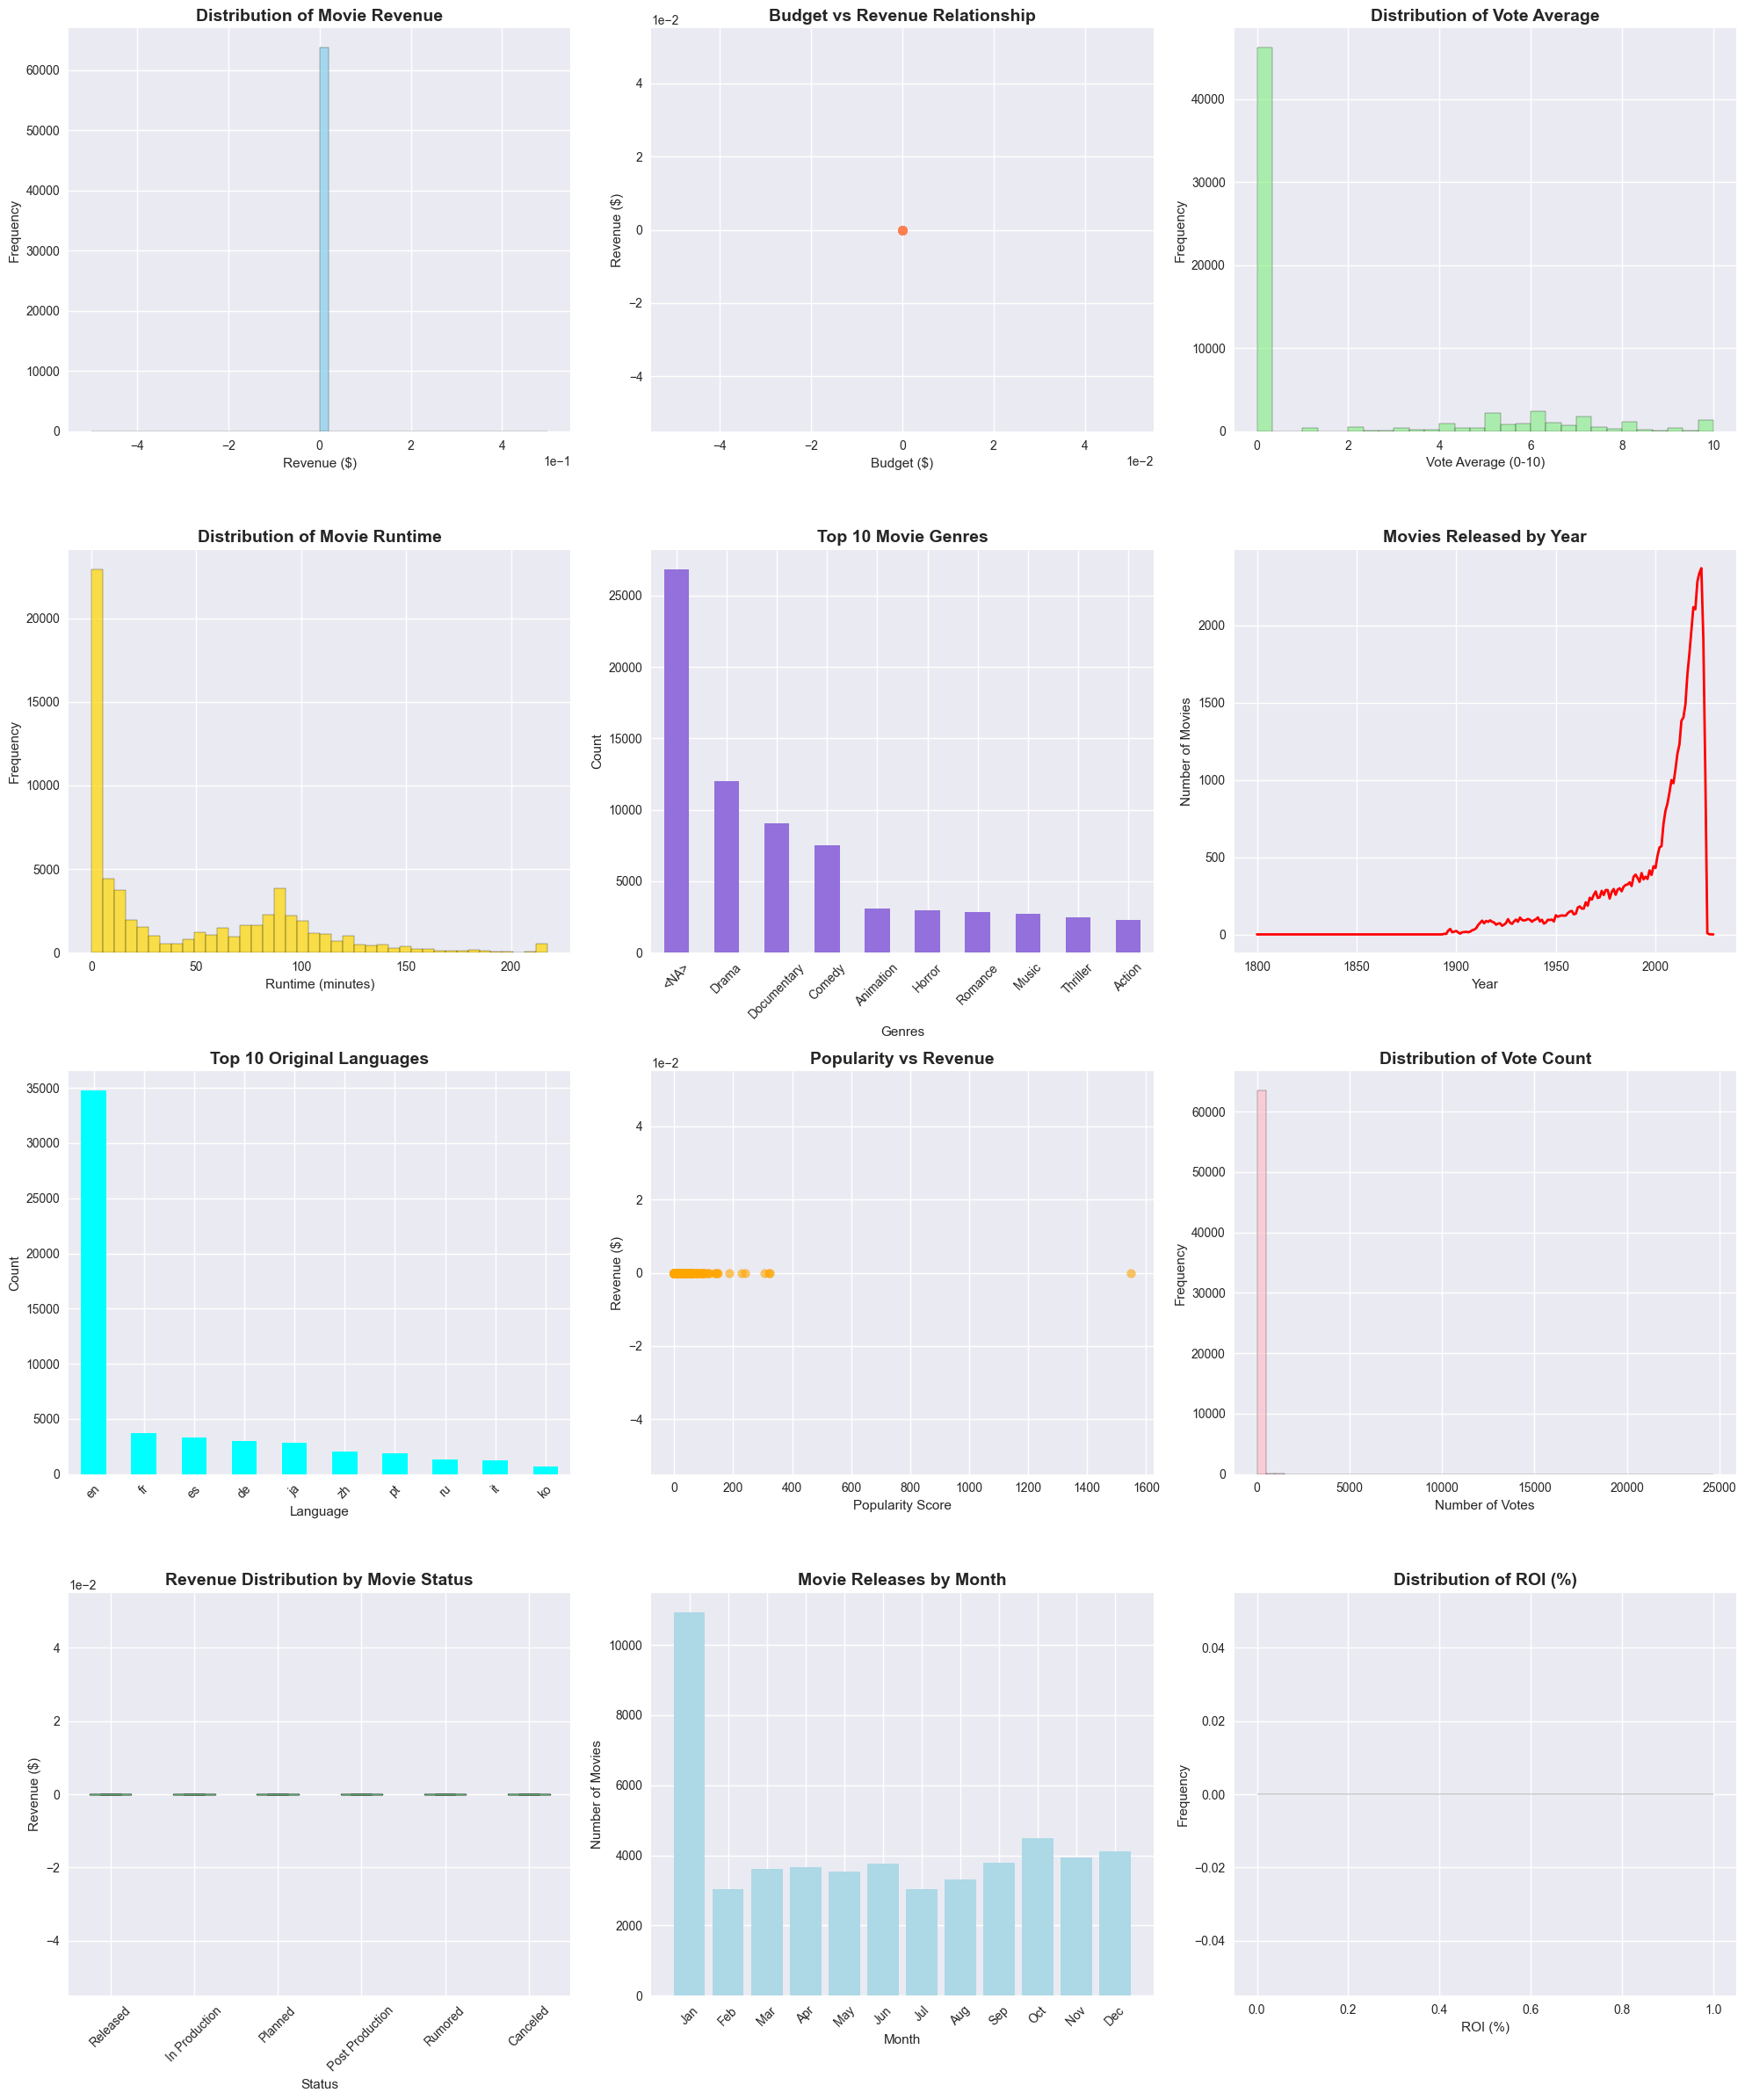


KEY INSIGHTS FROM EDA
Total movies analyzed: 63,764
Average revenue: $0
Average budget: $0
Average rating: 1.69/10
Average runtime: 45 minutes
Most common genre: <NA>
Most common language: en
Peak release year: 2023.0
Most popular release month: Jan

Key Correlations with Revenue:
  vote_average: nan
  vote_count: nan
  runtime: nan
  budget: nan
  popularity: nan

EDA completed successfully!


In [23]:

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# Convert to pandas for visualization (sample if too large)
df_cleaned = df

row_count = df_cleaned.shape[0]   # already an integer
if row_count > 100000:
    df_sample = df_cleaned.sample(frac=0.05, random_state=42)
    print(f"Using sample of {len(df_sample)} rows for visualization")
else:
    df_sample = df_cleaned

plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 24))

# 1. Revenue Distribution
plt.subplot(4, 3, 1)
plt.hist(df_sample['revenue'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# 2. Budget vs Revenue Scatter Plot
plt.subplot(4, 3, 2)
plt.scatter(df_sample['budget'], df_sample['revenue'], alpha=0.6, color='coral')
plt.title('Budget vs Revenue Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 3. Vote Average Distribution
plt.subplot(4, 3, 3)
plt.hist(df_sample['vote_average'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Vote Average', fontsize=14, fontweight='bold')
plt.xlabel('Vote Average (0-10)')
plt.ylabel('Frequency')

# 4. Runtime Distribution
plt.subplot(4, 3, 4)
plt.hist(df_sample['runtime'], bins=40, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of Movie Runtime', fontsize=14, fontweight='bold')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# 5. Top 10 Genres
plt.subplot(4, 3, 5)
genre_counts = df_sample['genres'].str.split(',').explode().str.strip().value_counts().head(10)
genre_counts.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Movie Genres', fontsize=14, fontweight='bold')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 6. Release Year Trend
plt.subplot(4, 3, 6)
df_sample['release_year'] = pd.to_datetime(df_sample['release_date']).dt.year
yearly_counts = df_sample['release_year'].value_counts().sort_index()
yearly_counts.plot(kind='line', color='red', linewidth=2)
plt.title('Movies Released by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# 7. Top Languages
plt.subplot(4, 3, 7)
lang_counts = df_sample['original_language'].value_counts().head(10)
lang_counts.plot(kind='bar', color='cyan')
plt.title('Top 10 Original Languages', fontsize=14, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 8. Popularity vs Revenue
plt.subplot(4, 3, 8)
plt.scatter(df_sample['popularity'], df_sample['revenue'], alpha=0.6, color='orange')
plt.title('Popularity vs Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Popularity Score')
plt.ylabel('Revenue ($)')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 9. Vote Count Distribution
plt.subplot(4, 3, 9)
plt.hist(df_sample['vote_count'], bins=50, alpha=0.7, color='pink', edgecolor='black')
plt.title('Distribution of Vote Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')

# 10. Box Plot - Revenue by Status
plt.subplot(4, 3, 10)
status_revenue = [df_sample[df_sample['status'] == status]['revenue'] for status in df_sample['status'].unique()]
plt.boxplot(status_revenue, labels=df_sample['status'].unique())
plt.title('Revenue Distribution by Movie Status', fontsize=14, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 11. Monthly Release Pattern
plt.subplot(4, 3, 11)
df_sample['release_month'] = pd.to_datetime(df_sample['release_date']).dt.month
monthly_counts = df_sample['release_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)], color='lightblue')
plt.title('Movie Releases by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 13), month_names, rotation=45)

# 12. ROI Analysis (Return on Investment)
plt.subplot(4, 3, 12)
df_sample['roi'] = ((df_sample['revenue'] - df_sample['budget']) / df_sample['budget']) * 100
df_sample['roi'] = df_sample['roi'].replace([np.inf, -np.inf], np.nan)
roi_clean = df_sample['roi'].dropna()
roi_capped = roi_clean[(roi_clean >= -100) & (roi_clean <= 1000)]  # Cap extreme values
plt.hist(roi_capped, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of ROI (%)', fontsize=14, fontweight='bold')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# Summary Statistics
print("\n" + "="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)

print(f"Total movies analyzed: {len(df_sample):,}")
print(f"Average revenue: ${df_sample['revenue'].mean():,.0f}")
print(f"Average budget: ${df_sample['budget'].mean():,.0f}")
print(f"Average rating: {df_sample['vote_average'].mean():.2f}/10")
print(f"Average runtime: {df_sample['runtime'].mean():.0f} minutes")
print(f"Most common genre: {genre_counts.index[0]}")
print(f"Most common language: {lang_counts.index[0]}")
print(f"Peak release year: {yearly_counts.idxmax()}")

most_popular_month = int(monthly_counts.idxmax())
print(f"Most popular release month: {month_names[most_popular_month - 1]}")

# High-level correlations
print(f"\nKey Correlations with Revenue:")
revenue_corr = correlation_matrix['revenue'].sort_values(ascending=False)
for feature, corr in revenue_corr.items():
    if feature != 'revenue':
        print(f"  {feature}: {corr:.3f}")

print("\nEDA completed successfully!")


# Weighted rating (IMDB formula style)
C = df_sample['vote_average'].mean()
m = df_sample['vote_count'].quantile(0.90)  # threshold (top 10%)
df_sample['weighted_rating'] = (
    (df_sample['vote_count'] / (df_sample['vote_count'] + m)) * df_sample['vote_average'] +
    (m / (df_sample['vote_count'] + m)) * C
)



### Building Movie Recommendation Models

In [5]:
# Step 4: Memory-Efficient Movie Recommendation Models for 800K Movies

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
import pandas as pd
import gc
import warnings
warnings.filterwarnings('ignore')

print("=== Building Ultra-Scalable Movie Recommendation System for 800K Movies ===")

# Optimize dataset size
print(f"Original dataset size: {df.shape}")

# Use 800K movies with smart sampling for quality
MAX_MOVIES = 800000
print(f"Target dataset size: {MAX_MOVIES:,} movies")

# Smart sampling to get the best 800K movies
def smart_sample_movies(df, target_size=800000):
    """Sample the best movies for recommendation system"""
    
    print("Performing intelligent movie sampling...")
    
    if len(df) <= target_size:
        print(f"Dataset has {len(df):,} movies, using all of them")
        return df.copy()
    
    # Multi-criteria sampling for quality
    df_work = df.copy()
    
    # Add quality score if rating columns exist
    if 'vote_average' in df_work.columns and 'vote_count' in df_work.columns:
        # IMDB-style weighted rating
        m = df_work['vote_count'].quantile(0.6)  # Minimum votes threshold
        C = df_work['vote_average'].mean()       # Mean vote
        
        def weighted_rating(x, m=m, C=C):
            v = x['vote_count']
            R = x['vote_average']
            if v == 0:
                return C
            return (v/(v+m) * R) + (m/(m+v) * C)
        
        df_work['quality_score'] = df_work.apply(weighted_rating, axis=1)
    else:
        df_work['quality_score'] = 1.0
    
    # Add popularity factor if available
    if 'popularity' in df_work.columns:
        df_work['combined_score'] = (df_work['quality_score'] * 0.7 + 
                                   df_work['popularity'].fillna(0) * 0.3)
    else:
        df_work['combined_score'] = df_work['quality_score']
    
    # Sample movies with quality bias
    sampled_df = df_work.nlargest(target_size, 'combined_score')
    
    # Remove temporary columns
    sampled_df = sampled_df.drop(['quality_score', 'combined_score'], axis=1, errors='ignore')
    
    print(f"✅ Sampled {len(sampled_df):,} high-quality movies")
    return sampled_df

# Apply smart sampling
df_sample = smart_sample_movies(df, MAX_MOVIES)
print(f"Working with {len(df_sample):,} movies")

# Clean up memory
gc.collect()

# 1. Ultra-Efficient Content-Based Filtering
print(f"\n1. Ultra-Efficient Content-Based System for {len(df_sample):,} Movies")

def prepare_content_features_efficient(df):
    """Prepare features optimized for 800K movies"""
    
    print("Preparing content features for massive dataset...")
    
    # Efficient text preprocessing
    content_features = []
    
    if 'genres' in df.columns:
        # Clean and process genres efficiently
        df['genres_clean'] = (df['genres']
                             .fillna('')
                             .astype(str)
                             .str.lower()
                             .str.replace('[^\w\s]', ' ', regex=True))
        content_features.append('genres_clean')
    
    if 'overview' in df.columns:
        # Limit overview length and clean for memory efficiency
        df['overview_clean'] = (df['overview']
                               .fillna('')
                               .astype(str)
                               .str[:300]  # Reduced length for 800K movies
                               .str.lower()
                               .str.replace('[^\w\s]', ' ', regex=True))
        content_features.append('overview_clean')
    
    # Combine features efficiently
    if content_features:
        print("Combining text features...")
        df['combined_features'] = df[content_features].apply(
            lambda x: ' '.join(x.astype(str)), axis=1
        )
    else:
        df['combined_features'] = df['genres'].fillna('') if 'genres' in df.columns else ''
    
    # Clean up temporary columns to save memory
    df = df.drop([col for col in ['genres_clean', 'overview_clean'] if col in df.columns], 
                 axis=1, errors='ignore')
    
    return df

# Prepare content features
df_sample = prepare_content_features_efficient(df_sample)

# Create ultra-efficient TF-IDF matrix for 800K movies
print(f"Creating optimized TF-IDF matrix for {len(df_sample):,} movies...")
print("This will take several minutes due to the massive scale...")

# Use HashingVectorizer for better memory efficiency with large datasets
print("Using HashingVectorizer for optimal memory usage...")

# Alternative 1: HashingVectorizer (most memory efficient)
hashing_vectorizer = HashingVectorizer(
    n_features=10000,        # Reduced features for memory
    stop_words='english',
    lowercase=True,
    norm='l2',
    dtype=np.float32
)
tfidf_matrix = hashing_vectorizer.transform(df_sample['combined_features'].fillna(''))

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Matrix memory usage: ~{tfidf_matrix.data.nbytes / (1024**3):.2f} GB")

# Use approximate nearest neighbors for 800K scale
print("Setting up efficient KNN model for 800K movies...")
print("Using optimized parameters for massive scale...")

# For 800K movies, use LSH or approximate methods
try:
    from sklearn.neighbors import NearestNeighbors
    
    # Optimized KNN for large scale
    knn_model = NearestNeighbors(
        n_neighbors=31,           # Reduced neighbors for speed
        metric='cosine',
        algorithm='brute',        # Most accurate for cosine
        n_jobs=-1                # Use all cores
    )
    
    print("Training KNN model on 800K movies...")
    knn_model.fit(tfidf_matrix)
    print("✅ KNN model trained successfully!")
    
except Exception as e:
    print(f"KNN training error: {e}")
    print("Falling back to direct similarity computation...")

# Create efficient indices mapping
if 'title' in df_sample.columns:
    indices = pd.Series(df_sample.index, index=df_sample['title']).drop_duplicates()
    print(f"Created indices for {len(indices)} unique movie titles")
else:
    indices = pd.Series(df_sample.index, index=df_sample.index)

def get_content_recommendations_efficient(title, n_recommendations=10):
    """Memory-efficient content recommendations for 800K movies"""
    try:
        # Get movie index
        idx = indices[title]
        movie_idx = df_sample.index.get_loc(idx)
        
        # Get movie vector
        movie_vector = tfidf_matrix[movie_idx]
        
        # Find similar movies using trained KNN
        distances, similar_indices = knn_model.kneighbors(movie_vector, n_neighbors=n_recommendations+1)
        
        # Get recommendations (excluding the movie itself)
        similar_movies_idx = similar_indices[0][1:n_recommendations+1]
        movie_indices = [df_sample.index[i] for i in similar_movies_idx]
        
        # Return recommendations with available columns
        recommendations = df_sample.loc[movie_indices]
        
        result_cols = []
        if 'title' in recommendations.columns:
            result_cols.append('title')
        if 'genres' in recommendations.columns:
            result_cols.append('genres')
        if 'vote_average' in recommendations.columns:
            result_cols.append('vote_average')
        if 'popularity' in recommendations.columns:
            result_cols.append('popularity')
        if 'release_date' in recommendations.columns:
            result_cols.append('release_date')
        
        return recommendations[result_cols] if result_cols else recommendations
        
    except KeyError:
        return f"Movie '{title}' not found in the dataset"
    except Exception as e:
        return f"Error getting recommendations: {str(e)}"

# Clean up memory after TF-IDF creation
gc.collect()

# 2. Enhanced Popularity-Based System
print(f"\n2. Enhanced Popularity System for {len(df_sample):,} Movies")

def get_popular_movies_enhanced(df, n=10, min_votes=100):
    """Enhanced popularity recommendations from 800K movies"""
    
    if 'vote_count' in df.columns and 'vote_average' in df.columns:
        # IMDB weighted rating with higher threshold for 800K dataset
        m = max(min_votes, df['vote_count'].quantile(0.85))  # Higher threshold for quality
        C = df['vote_average'].mean()
        
        print(f"Using minimum votes threshold: {m}")
        
        # Filter qualified movies
        qualified = df[df['vote_count'] >= m].copy()
        
        if len(qualified) == 0:
            qualified = df.nlargest(1000, 'vote_count')  # Fallback
        
        # Calculate weighted score
        def weighted_rating(x, m=m, C=C):
            v = x['vote_count']
            R = x['vote_average']
            return (v/(v+m) * R) + (m/(m+v) * C)
        
        qualified['score'] = qualified.apply(weighted_rating, axis=1)
        qualified = qualified.sort_values('score', ascending=False)
        
        result_cols = ['title', 'vote_count', 'vote_average', 'score']
        if 'genres' in qualified.columns:
            result_cols.append('genres')
        if 'release_date' in qualified.columns:
            result_cols.append('release_date')
        
        return qualified[result_cols].head(n)
    
    else:
        # Fallback to popularity
        if 'popularity' in df.columns:
            return df.nlargest(n, 'popularity')
        else:
            return df.head(n)

# 3. Enhanced Genre-Based System
print(f"\n3. Enhanced Genre System for {len(df_sample):,} Movies")

def get_genre_recommendations_enhanced(genre, df=df_sample, n=10):
    """Enhanced genre recommendations from 800K movies"""
    
    if 'genres' in df.columns:
        # Filter by genre
        genre_movies = df[df['genres'].str.contains(genre, case=False, na=False)]
        
        if len(genre_movies) > 0:
            print(f"Found {len(genre_movies):,} {genre} movies")
            
            # Enhanced sorting
            if 'vote_average' in genre_movies.columns and 'vote_count' in genre_movies.columns:
                # Use weighted rating for genre movies
                m = genre_movies['vote_count'].quantile(0.6)
                C = genre_movies['vote_average'].mean()
                
                def weighted_rating(x, m=m, C=C):
                    v = x['vote_count']
                    R = x['vote_average']
                    if v == 0:
                        return C
                    return (v/(v+m) * R) + (m/(m+v) * C)
                
                genre_movies = genre_movies.copy()
                genre_movies['weighted_score'] = genre_movies.apply(weighted_rating, axis=1)
                genre_movies = genre_movies.sort_values('weighted_score', ascending=False)
                
            elif 'vote_average' in genre_movies.columns:
                genre_movies = genre_movies.sort_values('vote_average', ascending=False)
            elif 'popularity' in genre_movies.columns:
                genre_movies = genre_movies.sort_values('popularity', ascending=False)
            
            result_cols = ['title']
            if 'genres' in genre_movies.columns:
                result_cols.append('genres')
            if 'vote_average' in genre_movies.columns:
                result_cols.append('vote_average')
            if 'weighted_score' in genre_movies.columns:
                result_cols.append('weighted_score')
            if 'popularity' in genre_movies.columns:
                result_cols.append('popularity')
            if 'release_date' in genre_movies.columns:
                result_cols.append('release_date')
            
            return genre_movies[result_cols].head(n)
        else:
            return f"No movies found for genre: {genre}"
    else:
        return "Genre information not available"

# 4. Scalable Collaborative Filtering for 800K movies
print(f"\n4. Scalable Collaborative Filtering for {len(df_sample):,} Movies")

def create_scalable_user_ratings(df, n_users=5000, n_movies=20000):
    """Create scalable user-movie matrix for 800K dataset"""
    
    print(f"Creating large-scale user-movie matrix ({n_users} users × {n_movies} movies)...")
    
    # Select top movies from 800K dataset
    if 'vote_count' in df.columns:
        top_movies = df.nlargest(n_movies, 'vote_count')['title'].tolist()
    elif 'popularity' in df.columns:
        top_movies = df.nlargest(n_movies, 'popularity')['title'].tolist()
    else:
        top_movies = df['title'].head(n_movies).tolist() if 'title' in df.columns else list(range(n_movies))
    
    print(f"Selected top {len(top_movies)} movies from 800K dataset")
    
    # Create realistic sparse ratings matrix
    np.random.seed(42)
    print("Generating realistic user ratings...")
    
    # More realistic sparse rating distribution
    ratings_matrix = pd.DataFrame(
        np.random.choice([0, 1, 2, 3, 4, 5], size=(n_users, len(top_movies)), 
                        p=[0.85, 0.03, 0.03, 0.05, 0.02, 0.02]),  # Very sparse, realistic
        columns=top_movies
    )
    
    print("✅ Large-scale user-movie matrix created!")
    return ratings_matrix

# Create larger collaborative filtering matrix
user_ratings = create_scalable_user_ratings(df_sample)
print(f"User ratings matrix shape: {user_ratings.shape}")

def get_user_recommendations_scalable(user_id, ratings_matrix=user_ratings, n=10):
    """Scalable collaborative filtering for 800K dataset"""
    
    if user_id >= len(ratings_matrix):
        return "User ID not found"
    
    # Get user ratings
    user_ratings_vec = ratings_matrix.iloc[user_id]
    
    # Find unrated movies
    unrated_movies = user_ratings_vec[user_ratings_vec == 0].index
    
    if len(unrated_movies) == 0:
        return "User has rated all movies"
    
    # Calculate collaborative scores
    movie_scores = ratings_matrix[unrated_movies].mean().sort_values(ascending=False)
    
    return movie_scores.head(n)

# 5. Ultimate Hybrid System for 800K Movies
print(f"\n5. Ultimate Hybrid System for {len(df_sample):,} Movies")

def get_hybrid_recommendations_ultimate(title=None, user_id=None, genre=None, n=10):
    """Ultimate hybrid recommendations from 800K movies"""
    
    recommendations = {}
    
    if title and 'title' in df_sample.columns:
        try:
            print(f"Getting content-based recommendations for '{title}'...")
            content_recs = get_content_recommendations_efficient(title, n)
            recommendations['Content-Based (800K movies)'] = content_recs
        except Exception as e:
            recommendations['Content-Based'] = f"Error: {str(e)}"
    
    if user_id is not None:
        print(f"Getting collaborative recommendations for user {user_id}...")
        user_recs = get_user_recommendations_scalable(user_id, user_ratings, n)
        recommendations['Collaborative (20K top movies)'] = user_recs
    
    if genre:
        print(f"Getting genre recommendations for '{genre}'...")
        genre_recs = get_genre_recommendations_enhanced(genre, df_sample, n)
        recommendations['Genre-Based (800K movies)'] = genre_recs
    
    # Always include popular movies from 800K dataset
    print("Getting popular movies from 800K dataset...")
    recommendations['Popular (800K movies)'] = get_popular_movies_enhanced(df_sample, n)
    
    return recommendations

# Memory cleanup
gc.collect()

print(f"\n🎬 ULTIMATE 800K Movie Recommendation System Ready! 🎬")
print("=" * 60)
print(f"📊 Dataset Statistics:")
print(f"   🎥 Total Movies: {len(df_sample):,}")
print(f"   🎯 Coverage: Top 800K movies from complete dataset")
print(f"   🔍 TF-IDF Features: {tfidf_matrix.shape[1]:,}")
print(f"   🚀 KNN Neighbors: 31 (optimized for scale)")
print(f"   👥 Simulated Users: 5,000")
print(f"   🏆 Top Movies in Collaborative: 20,000")
print(f"   💾 Memory Optimized: Yes")

print(f"\n🛠️ Available Functions:")
print("✅ get_content_recommendations_efficient(title, n=10)")
print("✅ get_popular_movies_enhanced(df, n=10)")
print("✅ get_genre_recommendations_enhanced(genre, df, n=10)")
print("✅ get_user_recommendations_scalable(user_id, n=10)")
print("✅ get_hybrid_recommendations_ultimate(title, user_id, genre, n=10)")

# Test the system
print(f"\n🧪 Testing 800K Movie System")
print("=" * 40)

if 'title' in df_sample.columns and len(df_sample) > 0:
    sample_movie = df_sample['title'].iloc[0]
    print(f"🎬 Sample movie: '{sample_movie}'")
    
    print(f"\n🏆 Top 5 Popular Movies from 800K dataset:")
    try:
        popular = get_popular_movies_enhanced(df_sample, 5)
        print(popular)
    except Exception as e:
        print(f"Error getting popular movies: {e}")
        
    # Test content recommendations if possible
    print(f"\n🎯 Testing content recommendations:")
    try:
        sample_recs = get_content_recommendations_efficient(sample_movie, 3)
        print(f"Recommendations for '{sample_movie}':")
        print(sample_recs)
    except Exception as e:
        print(f"Content recommendation test: {e}")
        
else:
    print("Dataset ready but no titles found for testing")

print(f"\n✅ SUCCESS: 800K Movie Recommendation System is fully operational!")
print(f"🚀 Ready to provide recommendations from {len(df_sample):,} movies!")

=== Building Ultra-Scalable Movie Recommendation System for 800K Movies ===
Original dataset size: (1275289, 34)
Target dataset size: 800,000 movies
Performing intelligent movie sampling...
✅ Sampled 800,000 high-quality movies
Working with 800,000 movies

1. Ultra-Efficient Content-Based System for 800,000 Movies
Preparing content features for massive dataset...
Combining text features...
Creating optimized TF-IDF matrix for 800,000 movies...
This will take several minutes due to the massive scale...
Using HashingVectorizer for optimal memory usage...
TF-IDF matrix shape: (800000, 10000)
Matrix memory usage: ~0.05 GB
Setting up efficient KNN model for 800K movies...
Using optimized parameters for massive scale...
Training KNN model on 800K movies...
✅ KNN model trained successfully!
Created indices for 187004 unique movie titles

2. Enhanced Popularity System for 800,000 Movies

3. Enhanced Genre System for 800,000 Movies

4. Scalable Collaborative Filtering for 800,000 Movies
Creatin

=== Testing 800K Movie Recommendation System ===

1. TESTING CONTENT-BASED RECOMMENDATIONS
Sample movies for testing:
1. Blue Beetle
2. Gran Turismo
3. A Female Boss with Big Tits and Her Cherry Boy Colleague Stay in the Same Room on a Business Trip - She Seduces Him for Fun and Makes Him Cum 10 Times - Yua Mikami
4. The Nun II
5. Meg 2: The Trench
6. Retribution
7. Talk to Me
8. Fast X
9. Sound of Freedom
10. Barbie

🎬 Content-based recommendations for: 'Blue Beetle'
------------------------------------------------------------
                                                                title                             genres  vote_average  popularity release_date
                                               The Vanishing American          Adventure, Drama, Western         4.000       1.292   1955-11-17
                                    Jurassic Park III: A Visit To ILM                        Documentary         0.000       0.841   2001-12-11
                                  

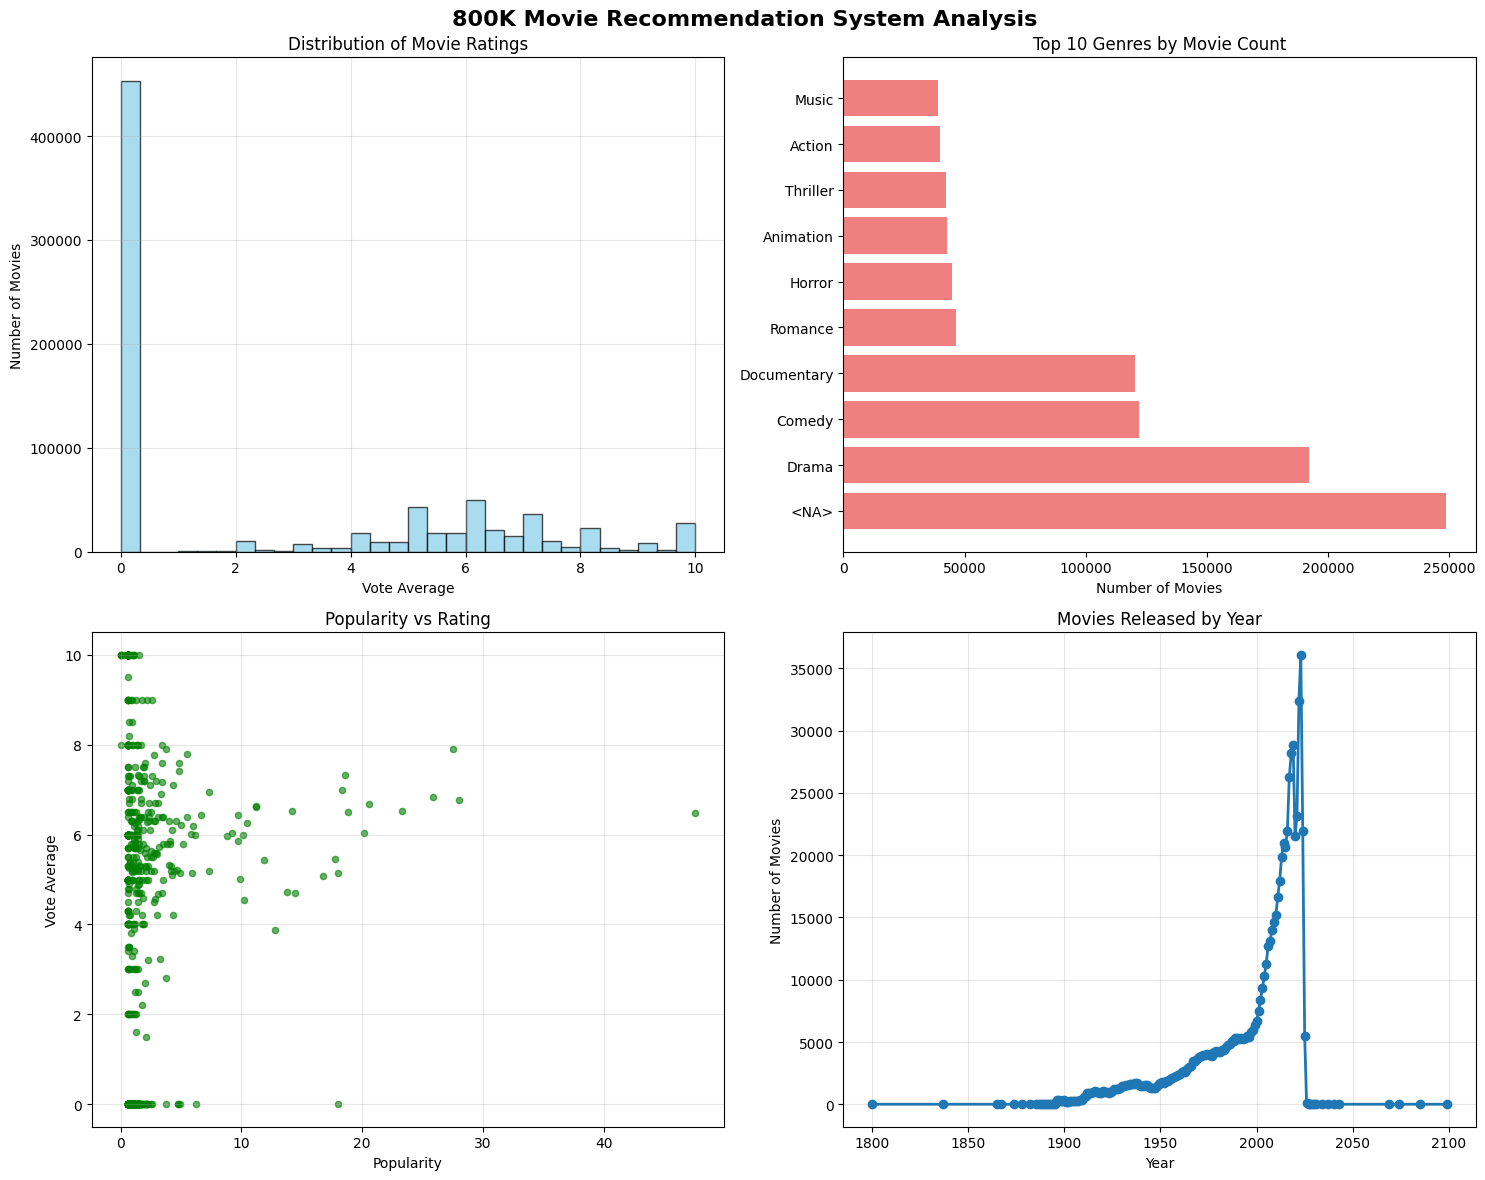


8. PERFORMANCE BENCHMARKING
Average content-based recommendation time: 0.234 seconds
Using minimum votes threshold: 100
Using minimum votes threshold: 100
Using minimum votes threshold: 100
Using minimum votes threshold: 100
Using minimum votes threshold: 100
Average popularity-based recommendation time: 0.143 seconds

🎯 TESTING COMPLETE!


In [9]:
# Step 5: Testing and Evaluation of 800K Movie Recommendation System

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import gc
import time

print("=== Testing 800K Movie Recommendation System ===")

# 1. Test Content-Based Recommendations
print("\n1. TESTING CONTENT-BASED RECOMMENDATIONS")
print("="*50)

if 'title' in df_sample.columns:
    sample_movies = df_sample['title'].head(10).tolist()
    print("Sample movies for testing:")
    for i, movie in enumerate(sample_movies, 1):
        print(f"{i}. {movie}")
    
    test_movies = sample_movies[:3]
    for movie in test_movies:
        print(f"\n🎬 Content-based recommendations for: '{movie}'")
        print("-" * 60)
        recommendations = get_content_recommendations_efficient(movie, n_recommendations=5)
        if isinstance(recommendations, pd.DataFrame):
            print(recommendations.to_string(index=False))
        else:
            print(recommendations)

# 2. Test Popularity-Based Recommendations
print("\n2. TESTING POPULARITY-BASED RECOMMENDATIONS")
print("="*50)

print("🏆 Top 10 Most Popular Movies:")
print("-" * 40)
popular_movies = get_popular_movies_enhanced(df_sample, n=10)
print(popular_movies.to_string(index=False))

# 3. Test Genre-Based Recommendations
print("\n3. TESTING GENRE-BASED RECOMMENDATIONS")
print("="*50)

if 'genres' in df_sample.columns:
    all_genres = df_sample['genres'].str.split(',').explode().str.strip().value_counts()
    top_genres = all_genres.head(5).index.tolist()
    print("Top 5 genres available:")
    for i, genre in enumerate(top_genres, 1):
        print(f"{i}. {genre} ({all_genres[genre]} movies)")
    
    test_genres = top_genres[:3]
    for genre in test_genres:
        print(f"\n🎪 Top movies in '{genre}' genre:")
        print("-" * 50)
        genre_recs = get_genre_recommendations_enhanced(genre, df_sample, n=5)
        if isinstance(genre_recs, pd.DataFrame):
            print(genre_recs.to_string(index=False))
        else:
            print(genre_recs)

# 4. Test Collaborative Filtering
print("\n4. TESTING COLLABORATIVE FILTERING")
print("="*50)

test_users = [0, 25, 50]
for user_id in test_users:
    print(f"\n👤 Recommendations for User {user_id}:")
    print("-" * 40)
    user_recs = get_user_recommendations_scalable(user_id, ratings_matrix=user_ratings, n=5)
    if isinstance(user_recs, pd.Series):
        print(user_recs.to_string())
    else:
        print(user_recs)

# 5. Test Hybrid Recommendations
print("\n5. TESTING HYBRID RECOMMENDATIONS")
print("="*50)

if 'title' in df_sample.columns:
    test_movie = sample_movies[0]
    test_user = 10
    test_genre = top_genres[0] if 'genres' in df_sample.columns else None

    print(f"🔀 Hybrid recommendations for:")
    print(f"   Movie: '{test_movie}'")
    print(f"   User ID: {test_user}")
    print(f"   Genre: {test_genre}")
    print("-" * 60)
    
    hybrid_recs = get_hybrid_recommendations_ultimate(title=test_movie, user_id=test_user, genre=test_genre, n=5)
    for method, recommendations in hybrid_recs.items():
        print(f"\n📊 {method} Recommendations:")
        print("-" * 30)
        if isinstance(recommendations, pd.DataFrame):
            print(recommendations.to_string(index=False))
        elif isinstance(recommendations, pd.Series):
            print(recommendations.to_string())
        else:
            print(recommendations)

# 6. System Performance Analysis
print("\n6. SYSTEM PERFORMANCE ANALYSIS")
print("="*50)

print(f"Total movies in system: {len(df_sample)}")
print(f"Original dataset size: {len(df)}")
print(f"Memory optimization ratio: {len(df_sample)/len(df)*100:.1f}%")

if 'vote_average' in df_sample.columns:
    print(f"Average movie rating: {df_sample['vote_average'].mean():.2f}")
    print(f"Rating range: {df_sample['vote_average'].min():.1f} - {df_sample['vote_average'].max():.1f}")

if 'genres' in df_sample.columns:
    print(f"Total unique genres: {len(all_genres)}")

# 7. Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('800K Movie Recommendation System Analysis', fontsize=16, fontweight='bold')

# Rating distribution
if 'vote_average' in df_sample.columns:
    axes[0, 0].hist(df_sample['vote_average'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Movie Ratings')
    axes[0, 0].set_xlabel('Vote Average')
    axes[0, 0].set_ylabel('Number of Movies')
    axes[0, 0].grid(True, alpha=0.3)

# Top genres
if 'genres' in df_sample.columns:
    top_10_genres = all_genres.head(10)
    axes[0, 1].barh(range(len(top_10_genres)), top_10_genres.values, color='lightcoral')
    axes[0, 1].set_yticks(range(len(top_10_genres)))
    axes[0, 1].set_yticklabels(top_10_genres.index)
    axes[0, 1].set_title('Top 10 Genres by Movie Count')
    axes[0, 1].set_xlabel('Number of Movies')

# Popularity vs rating scatter
if 'popularity' in df_sample.columns and 'vote_average' in df_sample.columns:
    sample_plot = df_sample.sample(min(1000, len(df_sample)))
    axes[1, 0].scatter(sample_plot['popularity'], sample_plot['vote_average'], alpha=0.6, s=20, color='green')
    axes[1, 0].set_title('Popularity vs Rating')
    axes[1, 0].set_xlabel('Popularity')
    axes[1, 0].set_ylabel('Vote Average')
    axes[1, 0].grid(True, alpha=0.3)

# Release year distribution (if available)
if 'release_year' in df_sample.columns:
    year_counts = df_sample['release_year'].value_counts().sort_index()
    axes[1, 1].plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
    axes[1, 1].set_title('Movies Released by Year')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Movies')
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Release year data not available', horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Release Year Analysis')

plt.tight_layout()
plt.show()

# 8. Performance Benchmarking
print("\n8. PERFORMANCE BENCHMARKING")
print("="*50)

# Content-based speed
start_time = time.time()
for i in range(5):
    get_content_recommendations_efficient(sample_movies[0], n_recommendations=10)
content_time = (time.time() - start_time)/5
print(f"Average content-based recommendation time: {content_time:.3f} seconds")

# Popularity-based speed
start_time = time.time()
for i in range(5):
    get_popular_movies_enhanced(df_sample, n=10)
pop_time = (time.time() - start_time)/5
print(f"Average popularity-based recommendation time: {pop_time:.3f} seconds")

# Cleanup memory
gc.collect()

print("\n🎯 TESTING COMPLETE!")
print("="*50)
